# Analysis of the results for the Ximantis dataset
# `ximantis_smooth_3`
## Setup

In [1]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt

In [2]:
timestamp = 12
day_length = 24 * timestamp
train_time = 227
total_number_of_cameras = 42

## Results

In [3]:
result = torch.tensor(np.load("STGAN/ximantis_smooth_3/result_lambda_G_1/result.npy"), dtype=torch.float)

In [4]:
result.shape

torch.Size([2880, 42, 3])

In [5]:
camera_num = 19
days = 10

<Axes: >

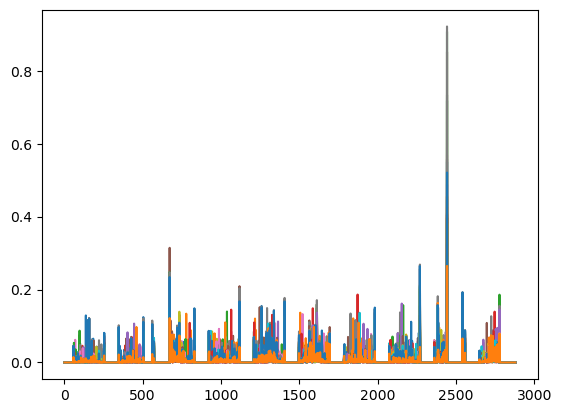

In [6]:
pd.DataFrame(result[:days*day_length, :, 0].numpy()).plot(legend=False)

<Axes: >

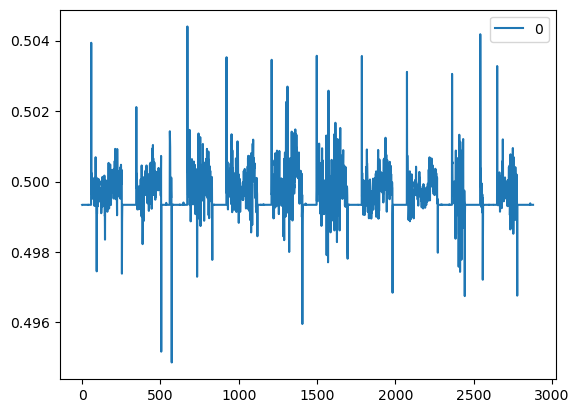

In [7]:
pd.DataFrame(result[:days*day_length, camera_num, 1].numpy()).plot()

<Axes: >

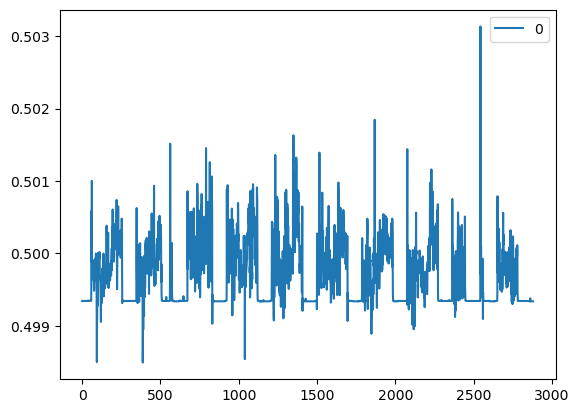

In [8]:
pd.DataFrame(result[:days*day_length, camera_num, 2].numpy()).plot()

## Anomaly scores from all the cameras
Combining the two scores, from the generator and the discriminator.

In [9]:
lambda_coef = 1
for camera_num in range(result.shape[1]):
    column_name = "ScoreCamera" + str(camera_num)
    if camera_num == 0:
        anomaly_score = pd.DataFrame([], columns=[column_name])
    s_G = pd.DataFrame(result[:, camera_num, 0].numpy())
    s_D = pd.DataFrame(result[:, camera_num, 1].numpy()) - pd.DataFrame(result[:, camera_num, 2].numpy())
    anomaly_score[column_name] = s_G + lambda_coef * s_D

<Axes: >

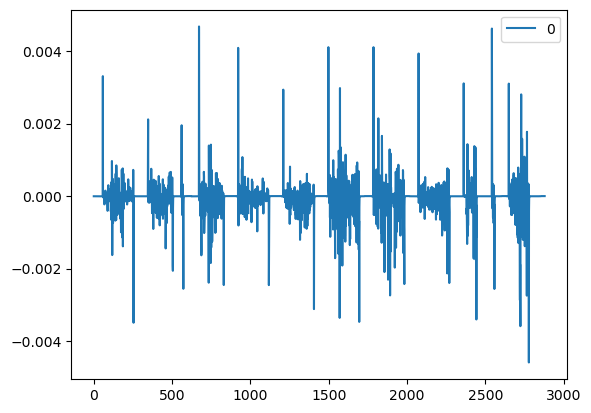

In [10]:
s_D.plot()

<Axes: >

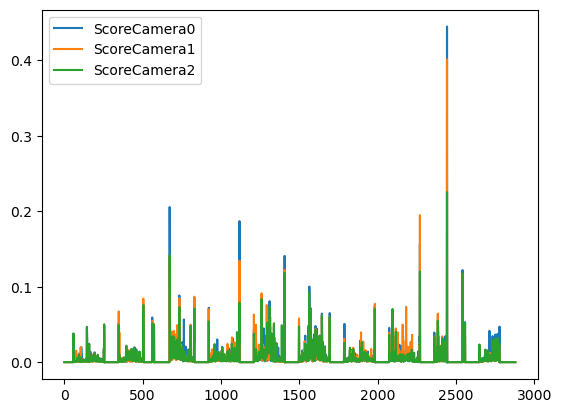

In [11]:
anomaly_score[anomaly_score.columns[:3]].plot()

In [12]:
anomaly_score

,ScoreCamera0,ScoreCamera1,ScoreCamera2,ScoreCamera3,ScoreCamera4,ScoreCamera5,ScoreCamera6,ScoreCamera7,ScoreCamera8,ScoreCamera9,...,ScoreCamera32,ScoreCamera33,ScoreCamera34,ScoreCamera35,ScoreCamera36,ScoreCamera37,ScoreCamera38,ScoreCamera39,ScoreCamera40,ScoreCamera41
0,-4.491287e-06,-4.491100e-06,-4.491217e-06,-4.491100e-06,-4.491240e-06,-4.491311e-06,-4.431589e-06,-4.491100e-06,-4.491298e-06,-4.431545e-06,...,-4.371880e-06,-4.491334e-06,-4.491311e-06,-4.491217e-06,-4.491287e-06,-4.491332e-06,-4.491147e-06,-4.491287e-06,-4.491217e-06,-4.491334e-06
1,-4.372091e-06,-4.491123e-06,-4.491240e-06,-4.491123e-06,-4.491264e-06,-4.491311e-06,-4.491217e-06,-4.431518e-06,-4.491311e-06,-4.491178e-06,...,-4.491123e-06,-4.431724e-06,-4.491334e-06,-4.491240e-06,-4.491311e-06,-4.491334e-06,-4.491170e-06,-4.491287e-06,-4.491240e-06,-4.491334e-06
2,-4.491311e-06,-4.491147e-06,-4.491264e-06,-4.431552e-06,-4.491287e-06,-4.491332e-06,-4.431636e-06,-4.491154e-06,-4.491321e-06,-4.491217e-06,...,-4.491147e-06,-4.491334e-06,-4.491334e-06,-4.491264e-06,-4.491311e-06,-4.491334e-06,-4.491194e-06,-4.491311e-06,-4.491264e-06,-4.431732e-06
3,-4.491319e-06,-4.491170e-06,-4.491287e-06,-4.491173e-06,-4.431706e-06,-4.491334e-06,-4.431652e-06,-4.491186e-06,-4.491334e-06,-4.491240e-06,...,-4.491170e-06,-4.491334e-06,-4.491334e-06,-4.491287e-06,-4.431717e-06,-4.491334e-06,-4.491217e-06,-4.491311e-06,-4.491287e-06,-4.491334e-06
4,-4.372120e-06,-4.431597e-06,-4.491287e-06,-4.491217e-06,-4.491311e-06,-4.491334e-06,-4.491267e-06,-4.491217e-06,-4.491334e-06,-4.491246e-06,...,-4.491194e-06,-4.491334e-06,-4.491334e-06,-4.491293e-06,-4.491334e-06,-4.491334e-06,-4.491240e-06,-4.491334e-06,-4.491295e-06,-4.491334e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,-2.382821e-07,-2.382821e-07,-2.382821e-07,-2.382821e-07,-2.382821e-07,-2.382821e-07,-2.978867e-07,-2.382821e-07,-2.382821e-07,-2.382821e-07,...,-2.382821e-07,-2.382821e-07,-2.382821e-07,-2.382821e-07,-2.382821e-07,-2.382821e-07,-2.382821e-07,-2.382821e-07,-2.382821e-07,-2.382821e-07
2876,-2.382821e-07,-2.382821e-07,-2.382821e-07,-2.382821e-07,-2.382821e-07,-2.382821e-07,-2.382821e-07,-2.978867e-07,-2.382821e-07,-2.382821e-07,...,-2.382821e-07,-2.382821e-07,-2.382821e-07,-2.382821e-07,-2.382821e-07,-2.382821e-07,-2.382821e-07,-2.382821e-07,-2.382821e-07,-2.978867e-07
2877,-2.978869e-07,-2.382821e-07,-2.382821e-07,-2.382821e-07,-2.382821e-07,-2.382821e-07,-2.978867e-07,-2.382821e-07,-2.978867e-07,-2.382821e-07,...,-2.382821e-07,-2.382821e-07,-2.382821e-07,-2.978867e-07,-2.382821e-07,-2.382821e-07,-2.382821e-07,-2.978860e-07,-2.978866e-07,-2.382821e-07
2878,-2.382821e-07,-2.978867e-07,-2.382821e-07,-2.382821e-07,-2.382821e-07,-2.382821e-07,-2.382821e-07,-2.382821e-07,-2.978867e-07,-2.382821e-07,...,-2.978867e-07,-2.978867e-07,-2.382821e-07,-2.382821e-07,-2.382821e-07,-2.382821e-07,-2.382821e-07,-2.382821e-07,-2.382821e-07,-2.382821e-07


<Axes: >

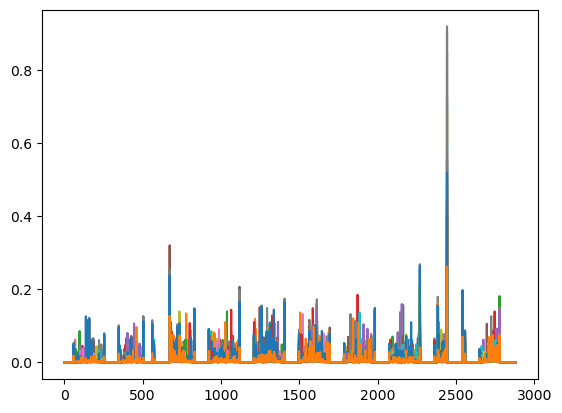

In [13]:
anomaly_score.plot(legend=False)

<Axes: title={'center': 'MSE loss'}>

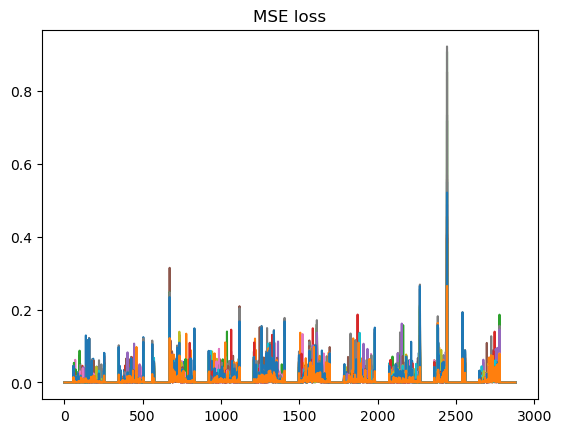

In [14]:
pd.DataFrame(result[:, :, 0].numpy()).plot(legend=False, title="MSE loss")

<Axes: title={'center': 'Real score'}>

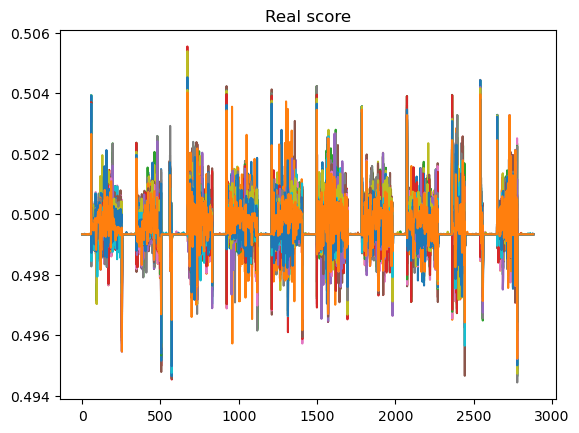

In [15]:
pd.DataFrame(result[:, :, 1].numpy()).plot(legend=False, title="Real score")

<Axes: title={'center': 'Fake score'}>

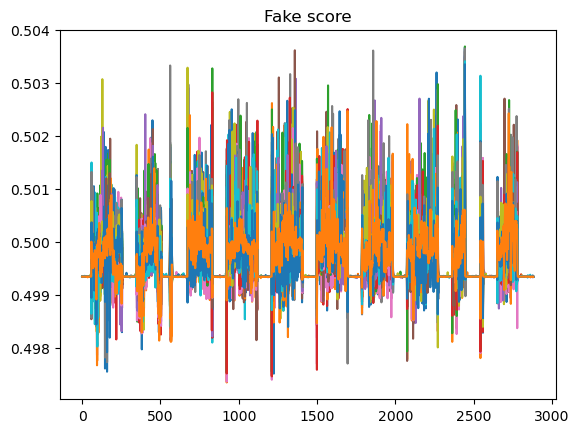

In [16]:
pd.DataFrame(result[:, :, 2].numpy()).plot(legend=False, title="Fake score")

## Selecting the top K% anomaly scores

In [17]:
K = 0.001

In [18]:
# Step 1: Flatten the DataFrame to get all values in a single array
flat_anomaly_score = anomaly_score.values.flatten()

# Step 2: Get the original coordinates
coordinates = [(i, j) for i in range(anomaly_score.shape[0]) for j in range(anomaly_score.shape[1])]

# Step 3: Sort the array while keeping track of the original coordinates
sorted_indices = np.argsort(flat_anomaly_score)[::-1]
sorted_coordinates = [coordinates[i] for i in sorted_indices]

# Print sorted coordinates
# for coord in sorted_coordinates:
#     print(coord)
#     print(anomaly_score.iloc[coord])

In [19]:
sorted_coordinates[:20]

[(2443, 27),
 (2443, 12),
 (2443, 5),
 (2443, 7),
 (2443, 22),
 (2443, 16),
 (2443, 37),
 (2443, 20),
 (2443, 40),
 (2443, 34),
 (2443, 21),
 (2443, 28),
 (2443, 4),
 (2443, 0),
 (2443, 31),
 (2443, 17),
 (2443, 3),
 (2443, 25),
 (2443, 1),
 (2443, 18)]

In [20]:
pd.Series([x[0] for x in sorted_coordinates[:20]]).nunique()

1

In [21]:
len(sorted_coordinates)

120960

<Axes: >

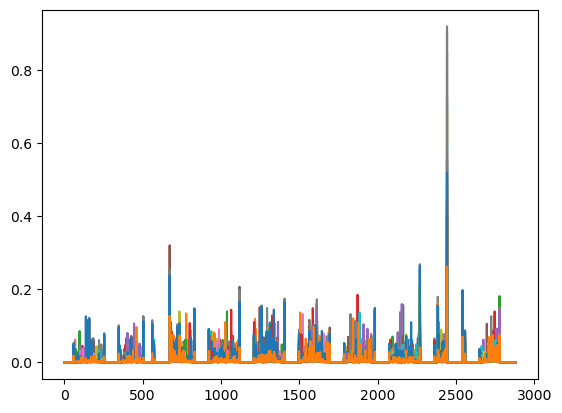

In [22]:
anomaly_score.plot(legend=False)

<Axes: >

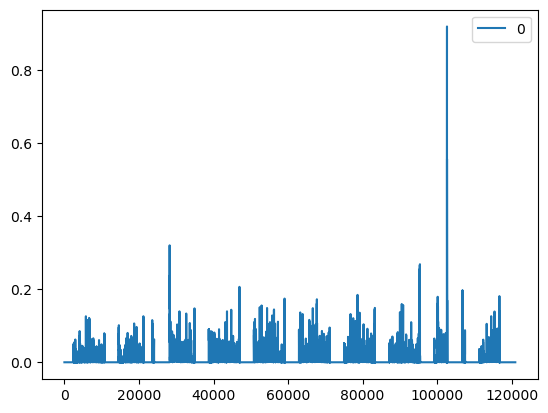

In [23]:
pd.DataFrame(flat_anomaly_score).plot()

In [24]:
head = int(np.floor(K * len(flat_anomaly_score)))

In [25]:
anomalies = sorted_coordinates[:head]
anomalies

[(2443, 27),
 (2443, 12),
 (2443, 5),
 (2443, 7),
 (2443, 22),
 (2443, 16),
 (2443, 37),
 (2443, 20),
 (2443, 40),
 (2443, 34),
 (2443, 21),
 (2443, 28),
 (2443, 4),
 (2443, 0),
 (2443, 31),
 (2443, 17),
 (2443, 3),
 (2443, 25),
 (2443, 1),
 (2443, 18),
 (2443, 32),
 (2443, 33),
 (2443, 11),
 (2443, 38),
 (2443, 29),
 (2443, 30),
 (672, 5),
 (2443, 26),
 (2443, 39),
 (2270, 37),
 (2443, 15),
 (2270, 20),
 (2270, 40),
 (2443, 41),
 (2443, 36),
 (2270, 7),
 (672, 27),
 (672, 22),
 (672, 12),
 (2443, 14),
 (672, 20),
 (672, 40),
 (672, 37),
 (672, 16),
 (672, 34),
 (2443, 6),
 (672, 31),
 (2443, 19),
 (2443, 8),
 (2443, 2),
 (2443, 23),
 (2443, 9),
 (2270, 21),
 (2443, 24),
 (2270, 39),
 (2270, 18),
 (2270, 4),
 (1118, 5),
 (2443, 10),
 (672, 0),
 (2270, 38),
 (2270, 5),
 (1118, 27),
 (2542, 40),
 (2542, 20),
 (2542, 37),
 (2542, 7),
 (2270, 1),
 (1118, 12),
 (1118, 0),
 (2443, 13),
 (2444, 5),
 (672, 28),
 (672, 7),
 (1872, 13),
 (2542, 39),
 (2778, 22),
 (2444, 12),
 (2384, 7),
 (1406, 

In [26]:
minutes = pd.Series([minutes for minutes, camera_nums in anomalies])
camera_nums = pd.Series([camera_nums for minutes, camera_nums in anomalies])

In [27]:
minutes

0      2443
1      2443
2      2443
3      2443
4      2443
       ... 
115    1259
116    1247
117    1612
118    2778
119    1118
Length: 120, dtype: int64

In [28]:
camera_nums

0      27
1      12
2       5
3       7
4      22
       ..
115    40
116    25
117    22
118    27
119    22
Length: 120, dtype: int64

In [29]:
raw_path = "../traffic_data/dataset3/dens_0501"
raw = pd.read_pickle(raw_path)
camera_ids = raw.columns.map(lambda x: x[4:])
assert(len(camera_ids) == total_number_of_cameras)
camera_ids

Index(['Cam2', 'Cam4', 'Cam5', 'Cam7', 'Cam10', 'Cam14', 'Cam15', 'Cam16',
       'Cam17', 'Cam20', 'Cam23', 'Cam24', 'Cam25', 'Cam27', 'Cam29', 'Cam30',
       'Cam44', 'Cam45', 'Cam46', 'Cam49', 'Cam51', 'Cam72', 'Cam73', 'Cam79',
       'Cam80', 'Cam81', 'Cam88', 'Cam93', 'Cam94', 'Cam95', 'Cam96', 'Cam98',
       'Cam99', 'Cam103', 'Cam104', 'Cam105', 'Cam111', 'Cam112', 'Cam113',
       'Cam114', 'Cam115', 'Cam116'],
      dtype='object')

In [30]:
day_tmp, tmp = divmod(minutes*int(60/timestamp), 60*24)
days = day_tmp + 1
clock_hour, clock_min = divmod(tmp, 60)

for i, day in enumerate(days):
    print(f"Anomaly at: camera id {camera_ids[camera_nums[i]]}, camera #{camera_nums[i]}, day #{day} of test, at {clock_hour[i]}:{clock_min[i]}.")

Anomaly at: camera id Cam93, camera #27, day #9 of test, at 11:35.
Anomaly at: camera id Cam25, camera #12, day #9 of test, at 11:35.
Anomaly at: camera id Cam14, camera #5, day #9 of test, at 11:35.
Anomaly at: camera id Cam16, camera #7, day #9 of test, at 11:35.
Anomaly at: camera id Cam73, camera #22, day #9 of test, at 11:35.
Anomaly at: camera id Cam44, camera #16, day #9 of test, at 11:35.
Anomaly at: camera id Cam112, camera #37, day #9 of test, at 11:35.
Anomaly at: camera id Cam51, camera #20, day #9 of test, at 11:35.
Anomaly at: camera id Cam115, camera #40, day #9 of test, at 11:35.
Anomaly at: camera id Cam104, camera #34, day #9 of test, at 11:35.
Anomaly at: camera id Cam72, camera #21, day #9 of test, at 11:35.
Anomaly at: camera id Cam94, camera #28, day #9 of test, at 11:35.
Anomaly at: camera id Cam10, camera #4, day #9 of test, at 11:35.
Anomaly at: camera id Cam2, camera #0, day #9 of test, at 11:35.
Anomaly at: camera id Cam98, camera #31, day #9 of test, at 11:3

## Plotting the anomalies for a specific camera

In [31]:
# Choose the camera
camera_num = 12

In [32]:
minutes[camera_nums == camera_num]

1      2443
38      672
68     1118
77     2444
81     2778
91     1612
112    2270
dtype: int64

In [33]:
# Read again, all the training data
data = torch.tensor(np.load("STGAN/ximantis_smooth_3/data/data.npy"), dtype=torch.float)
df = pd.DataFrame(data[train_time*day_length:, camera_num, 0, 0])
df.columns = ["Flow"]

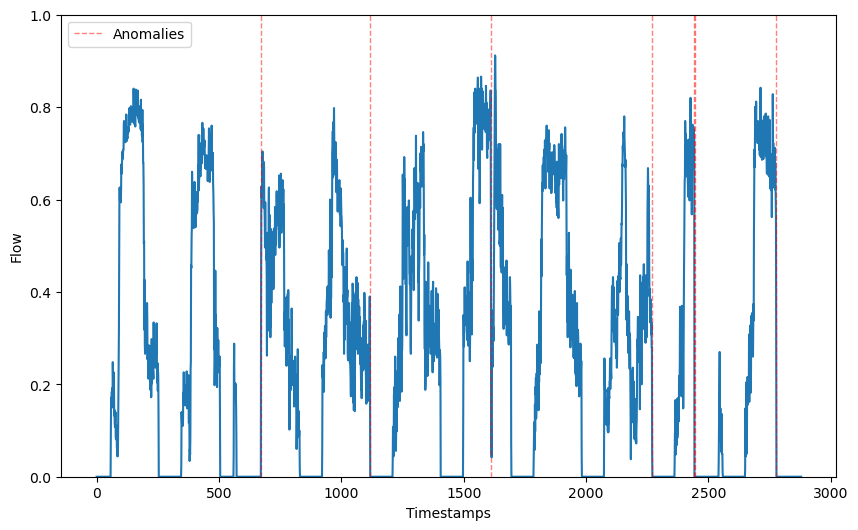

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(df["Flow"])

for i, time in enumerate(minutes[camera_nums == camera_num]):
    if i == 0:
        plt.axvline(x=time, color='r', linestyle='--', linewidth=1, alpha=0.5, label="Anomalies")
    else:
        plt.axvline(x=time, color='r', linestyle='--', linewidth=1, alpha=0.5)


plt.xlabel("Timestamps")
plt.ylabel("Flow")
plt.ylim([0,1])
plt.legend()
plt.show()

## Notes 

Previously, I was filling the NaN values in the flow curves with zeros. Now, I have implemented a different approach using the "ffill" (forward fill) method in pandas. This method propagates the last valid observation to the next valid one. Additionally, I set a limit of 10 as the maximum number of consecutive NaN values to fill using this method. Beyond this limit, I revert to filling the NaN values with zeros. 

As a result, I was able to identify a correct anomaly. On November 22, 2020, at 11:25, the signal from the camera is apparently cut (the are no photos in the folder until 8pm). The algorithm flagged this as an anomaly because, with the new approach, if we don't have data for 10 consecutive minutes, the value is set to zero. This caused a clear spike in the data at November 22, 11:35, exactly 10 minutes after the NaN values started being filled with zeros due to reaching the maximum limit.

Also, in day #6 of test, the anomaly we catch is heavy snowfall! See the figure above.